# Week 8 - Advanced Machine Learning

## Anomaly detection

Anomaly (or outlier) detection attempts to identify samples that do not fit within the normal sample population.

Anomaly detection is used in fault detection, fraud prevention, intrusion detection in computer systems, etc.

Anomaly detection may also be used prior to other machine learning techniques to remove outliers and improve the accuracy of the final model.

Both unsupervised and supervised techniques exist for anomaly detection.

**Unsupervised** techniques build a model of the samples assuming that most are normal and then samples furthest from the core population are considered to be anomalies.

**Supervised** techniques use a labeled dataset of normal and abnormal samples to build a classifier.

**Semi-supervised** techniques also exist using datasets verified to contain only normal samples.

### Anomalously appearing normal samples

Some knowledge of the types of anomaly that might occur is important. For example, in intrusion detection a single event by itself might be entirely normal but appear at an abnormal rate. Specifically, a single failed login attempt compared with a sudden burst of failed login attempts.

The features required to detect this type of event will be different to the features needed for events that by themselves can be anomalous.

[Scikit learn](http://scikit-learn.org/stable/modules/outlier_detection.html) has three main approaches for anomaly detection: novelty detection (OneClassSVM) and outlier detection (EllipticEnvelope and IsolationForest)

In [4]:
# Example taken from http://scikit-learn.org/stable/auto_examples/svm/plot_oneclass.html
# Use of OneClassSVM to detect novel samples.

import numpy as np
import matplotlib.pyplot as plt
import matplotlib.font_manager
from sklearn import svm

%matplotlib inline

xx, yy = np.meshgrid(np.linspace(-5, 5, 500), np.linspace(-5, 5, 500))
# Generate train data
X = 0.3 * np.random.randn(100, 2)
X_train = np.r_[X + 2, X - 2]
# Generate some regular novel observations
X = 0.3 * np.random.randn(20, 2)
X_test = np.r_[X + 2, X - 2]
# Generate some abnormal novel observations
X_outliers = np.random.uniform(low=-4, high=4, size=(20, 2))

In [5]:
# fit the model
clf = svm.OneClassSVM(nu=0.1, kernel="rbf", gamma=0.1)
clf.fit(X_train)
y_pred_train = clf.predict(X_train)
y_pred_test = clf.predict(X_test)
y_pred_outliers = clf.predict(X_outliers)
n_error_train = y_pred_train[y_pred_train == -1].size
n_error_test = y_pred_test[y_pred_test == -1].size
n_error_outliers = y_pred_outliers[y_pred_outliers == 1].size

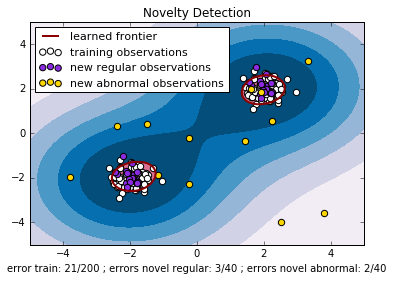

In [6]:
# plot the line, the points, and the nearest vectors to the plane
Z = clf.decision_function(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

plt.title("Novelty Detection")
plt.contourf(xx, yy, Z, levels=np.linspace(Z.min(), 0, 7), cmap=plt.cm.PuBu)
a = plt.contour(xx, yy, Z, levels=[0], linewidths=2, colors='darkred')
plt.contourf(xx, yy, Z, levels=[0, Z.max()], colors='palevioletred')

s = 40
b1 = plt.scatter(X_train[:, 0], X_train[:, 1], c='white', s=s)
b2 = plt.scatter(X_test[:, 0], X_test[:, 1], c='blueviolet', s=s)
c = plt.scatter(X_outliers[:, 0], X_outliers[:, 1], c='gold', s=s)
plt.axis('tight')
plt.xlim((-5, 5))
plt.ylim((-5, 5))
plt.legend([a.collections[0], b1, b2, c],
           ["learned frontier", "training observations",
            "new regular observations", "new abnormal observations"],
           loc="upper left",
           prop=matplotlib.font_manager.FontProperties(size=11))
plt.xlabel(
    "error train: %d/200 ; errors novel regular: %d/40 ; "
    "errors novel abnormal: %d/40"
    % (n_error_train, n_error_test, n_error_outliers))
plt.show()

### Isolation Forest

In [ ]:
from sklearn.ensemble import IsolationForest
rng = np.random.RandomState(42)

# fit the model
clf = IsolationForest(max_samples=100, random_state=rng)
clf.fit(X_train)
y_pred_train = clf.predict(X_train)
y_pred_test = clf.predict(X_test)
y_pred_outliers = clf.predict(X_outliers)

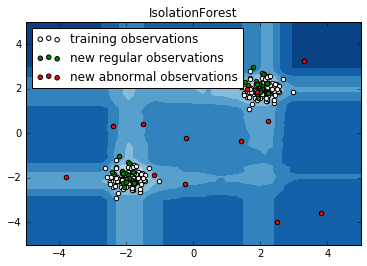

In [9]:
# plot the line, the samples, and the nearest vectors to the plane
xx, yy = np.meshgrid(np.linspace(-5, 5, 50), np.linspace(-5, 5, 50))
Z = clf.decision_function(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

plt.title("IsolationForest")
plt.contourf(xx, yy, Z, cmap=plt.cm.Blues_r)

b1 = plt.scatter(X_train[:, 0], X_train[:, 1], c='white')
b2 = plt.scatter(X_test[:, 0], X_test[:, 1], c='green')
c = plt.scatter(X_outliers[:, 0], X_outliers[:, 1], c='red')
plt.axis('tight')
plt.xlim((-5, 5))
plt.ylim((-5, 5))
plt.legend([b1, b2, c],
           ["training observations",
            "new regular observations", "new abnormal observations"],
           loc="upper left")
plt.show()